In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

**1. Load data**

In [17]:
mnist_number_train = pd.read_csv('train.csv')
mnist_number_test = pd.read_csv('test.csv')

**2. Split features and labels**

In [18]:
train_labels = mnist_number_train.iloc[:, 0].values
train_images = mnist_number_train.iloc[:, 1:].values
test_images = mnist_number_test.values  

**3.Sample Image Visualization**

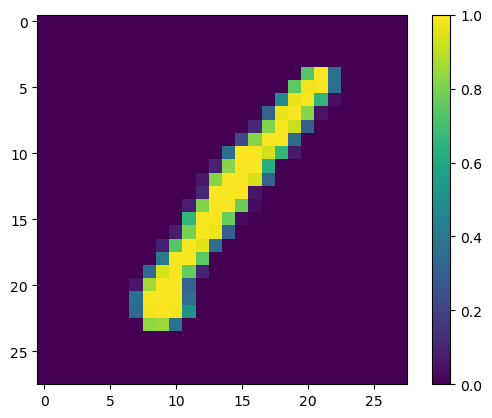

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**3.1 Plot first 10 images with their labels**

In [13]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

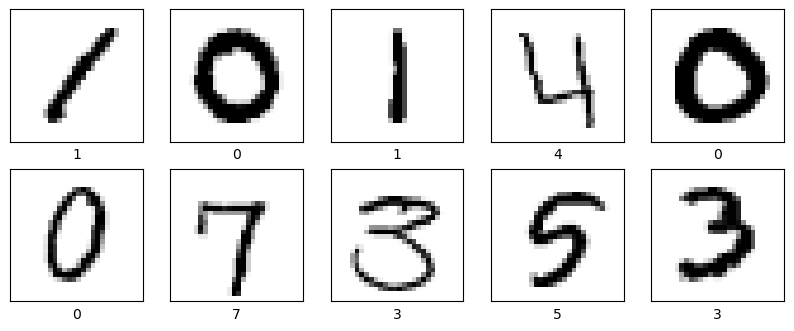

In [15]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**4. Reshape into 28x28 grayscale images**

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

**5.Normalize pixel values**

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**6.Split training data for validation**

In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

**7.Build a simple neural network**

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)   # 10 classes for digits 0–9
])

**8.Compile the model**

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

**9.Train the model with validation**

In [25]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9111 - loss: 0.3133 - val_accuracy: 0.9460 - val_loss: 0.1844
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9598 - loss: 0.1385 - val_accuracy: 0.9579 - val_loss: 0.1398
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9711 - loss: 0.0969 - val_accuracy: 0.9652 - val_loss: 0.1143
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9788 - loss: 0.0723 - val_accuracy: 0.9705 - val_loss: 0.0983
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9838 - loss: 0.0542 - val_accuracy: 0.9640 - val_loss: 0.1172
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9869 - loss: 0.0442 - val_accuracy: 0.9636 - val_loss: 0.1204
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9889 - loss: 0.0353 - val_accuracy: 0.9662 - val_loss: 0.1069
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9921 - loss: 0

**10. Evaluate on validation set (just to check accuracy)**

In [26]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print("\nValidation accuracy:", val_acc)

132/132 - 1s - 6ms/step - accuracy: 0.9738 - loss: 0.0923

Validation accuracy: 0.973809540271759


**11. Predict labels for Kaggle test.csv**

In [27]:
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


**12. Create submission file**

In [28]:
submission = pd.DataFrame({
    "ImageId": list(range(1, len(predicted_labels)+1)),
    "Label": predicted_labels
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv is ready for Kaggle upload!")


✅ submission.csv is ready for Kaggle upload!
